In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import sklearn.metrics
 
df_c = pd.read_csv(os.getcwd()+"/data/customer.csv")

df_int = pd.read_csv(os.getcwd()+"/data/internet.csv")

df = pd.merge(df_c, df_int, how='left', on = 'id')

df.head()

df[df.isnull().any(axis = 1)]

df['MB used'].fillna(df['MB used'].mean(), inplace=True)

df['app'].fillna(method='ffill', inplace=True)

df_copy = df.copy()

df[df.isnull().any(axis = 1)]
# df.head()

,id,first_name,last_name,email_id,birthdate,street_address,zipcode,city,state,phone_number,active,region,gender,age,connection_type,average_call_length,app,MB used


### Label Encoding

In [2]:
#**********************Labeling regions*******************

region = df['region'].values

df_region = pd.DataFrame({'region':region})

le = LabelEncoder()

le.fit(region)
region = le.transform(region)
df['region'] = region

#getting a copy
df_region['encoded'] = region

#**********************Labeling gender*******************

gender = df['gender'].values

df_gender = pd.DataFrame({'gender':gender})

le = LabelEncoder()

le.fit(gender)
gender = le.transform(gender)
df['gender'] = gender

#getting a copy
df_gender['encoded'] = gender

#**********************Labeling active*******************

active = df['active'].values

df_active = pd.DataFrame({'active':active})

le = LabelEncoder()

le.fit(active)
active = le.transform(active)
df['active'] = active

#getting a copy
df_active['encoded'] = active

#**********************Labeling apps*******************

app = df['app'].values

df_app = pd.DataFrame({'app':app})

le = LabelEncoder()

le.fit(app)
app = le.transform(app)
df['app'] = app

#getting a copy
df_app['encoded'] = app


#**********************Labeling connection*******************

con = df['connection_type'].values

df_con = pd.DataFrame({'connection':con})

le = LabelEncoder()

le.fit(con)
con = le.transform(con)
df['connection_type'] = con

#getting a copy
df_con['encoded'] = con

#keep only required characteristics
df.drop(['id','first_name','last_name','email_id','birthdate','street_address','zipcode',
                     'city','state','phone_number'],axis=1,inplace = True)
df.head()


,active,region,gender,age,connection_type,average_call_length,app,MB used
0,0,3,1,60,0,60.7,13,805.24
1,0,3,1,60,0,60.7,6,164.21
2,0,3,1,60,0,60.7,15,311.08
3,0,3,1,60,0,60.7,12,77.80
4,0,3,1,60,0,60.7,7,648.48


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

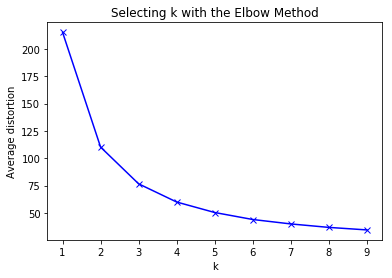

In [3]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]
 
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df)
    prediction=model.predict(df)
    meanDistortions.append(sum(np.min(cdist(df, model.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])
 
#plt.cla()
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

### Finding optimal number of clusters

In [4]:
#Optimal clusters is 2
final_model=KMeans(4)
final_model.fit(df)
prediction=final_model.predict(df)

kmeans = pd.DataFrame(prediction)

#Join predicted clusters back to raw data
df_copy["personas"] = prediction

df_copy.replace({'personas':{0:'Persona1',1:'Persona2',2:'Persona3',3:'Persona4'}}, inplace=True)

gender = df_copy['gender'].values
pers = df_copy['personas'].values
final_personas = []

for i in range(0,len(gender)):
    if pers[i]=='Persona1' and gender[i]=='Male':
        final_personas.append('Jason')
    elif pers[i]=='Persona1' and gender[i]=='Female':
        final_personas.append('Jessica')
    elif pers[i]=='Persona2' and gender[i]=='Male':
        final_personas.append('Matt')
    elif pers[i]=='Persona2' and gender[i]=='Female':
        final_personas.append('Tiffany')
    elif pers[i]=='Persona3' and gender[i]=='Male':
        final_personas.append('Andrew')
    elif pers[i]=='Persona3' and gender[i]=='Female':
        final_personas.append('Erica')
    elif pers[i]=='Persona4' and gender[i]=='Male':
        final_personas.append('David')
    else:
        final_personas.append('Gina')
        
df_copy['personas']=final_personas

df_copy[['id','first_name','last_name','email_id','birthdate','street_address','zipcode','city','state','phone_number','region','age','gender','active','MB used','app','connection_type','average_call_length','personas']].head(10)

,id,first_name,last_name,email_id,birthdate,street_address,zipcode,city,state,phone_number,region,age,gender,active,MB used,app,connection_type,average_call_length,personas
0,1,Eustace,McCoid,emccoid0@parallels.com,5/18/59,0308 Bunker Hill Parkway,92844,Garden Grove,California,310-554-8521,PacificCoastal,60,Male,False,805.24,Venmo,new,60.70,Matt
1,1,Eustace,McCoid,emccoid0@parallels.com,5/18/59,0308 Bunker Hill Parkway,92844,Garden Grove,California,310-554-8521,PacificCoastal,60,Male,False,164.21,Google,new,60.70,Jason
2,1,Eustace,McCoid,emccoid0@parallels.com,5/18/59,0308 Bunker Hill Parkway,92844,Garden Grove,California,310-554-8521,PacificCoastal,60,Male,False,311.08,Wikipedia,new,60.70,Andrew
3,1,Eustace,McCoid,emccoid0@parallels.com,5/18/59,0308 Bunker Hill Parkway,92844,Garden Grove,California,310-554-8521,PacificCoastal,60,Male,False,77.80,Twitter,new,60.70,Jason
4,1,Eustace,McCoid,emccoid0@parallels.com,5/18/59,0308 Bunker Hill Parkway,92844,Garden Grove,California,310-554-8521,PacificCoastal,60,Male,False,648.48,Instagram,new,60.70,David
5,2,Isador,Maestro,imaestro1@naver.com,5/26/06,41 Kings Alley,28272,Charlotte,North Carolina,704-996-0008,Southern,13,Male,True,554.89,Yahoo,ported,11.97,David
6,2,Isador,Maestro,imaestro1@naver.com,5/26/06,41 Kings Alley,28272,Charlotte,North Carolina,704-996-0008,Southern,13,Male,True,395.11,Bing,ported,11.97,Andrew
7,2,Isador,Maestro,imaestro1@naver.com,5/26/06,41 Kings Alley,28272,Charlotte,North Carolina,704-996-0008,Southern,13,Male,True,51.31,Google,ported,11.97,Jason
8,2,Isador,Maestro,imaestro1@naver.com,5/26/06,41 Kings Alley,28272,Charlotte,North Carolina,704-996-0008,Southern,13,Male,True,104.41,Twitter,ported,11.97,Jason
9,2,Isador,Maestro,imaestro1@naver.com,5/26/06,41 Kings Alley,28272,Charlotte,North Carolina,704-996-0008,Southern,13,Male,True,66.58,Whatsapp,ported,11.97,Jason


In [5]:
df_copy.to_csv(os.getcwd()+ '/data/final.csv', index=False)